## Continuous Control Project

![](https://user-images.githubusercontent.com/10624937/43851024-320ba930-9aff-11e8-8493-ee547c6af349.gif)

- More info about the purpose of the project can be read here : [Udacity Project link](https://github.com/udacity/deep-reinforcement-learning/tree/master/p2_continuous-control)


## Prerequisites

- Create a python env as described here: https://github.com/udacity/deep-reinforcement-learning/tree/master/python

- Download the project structure here : [github](https://github.com/antoniopenta/deep_reinforcement_learning/tree/master/drl_continous_control)

- The Reacher with 20 agents has been choosen.

- You need to download the unity env Reacher at the following link (Mac) and save it (unzipped) in the env folder of the main project: https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/Reacher.app.zip


- **AWS configuration**, the code has been runned on the AWS instance using GPU.
    - To AWS instance (p2.xlarge) is the Deep Learning AMI with Source Code (CUDA 8, Ubuntu) (you can search it on the AWS Marketplace). I have used the credit from the Udacity course.
    -  The configuration is well explained in the extrac curriculm activities (you can find notes with more details in aws.txt file saved within this repository).

- For AWS, the unity env can be downloaded [here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/Reacher_Linux_NoVis.zip), You will not be able to watch the agent without enabling a virtual screen, but you will be able to train the agent.
    
 


## Project Structure

- The project has these foldes:
    - **data**: it contains data that are created during the execution
    - **framework**: it contain the code for the agents and the network for learning the Q function
    - **env**: where the unity env is store
    - **model**: where the checkpoint for the network is saved
    - **jupyter**: where the notebook with the explanation is store
    
     

## Problem Description
This project uses **Reacher** Unity environment. 

- In this environment, a double-jointed arm can move to target locations. 
- A reward of +0.1 is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.
- The observation space consists of 33 variables corresponding to position, rotation, velocity, and angular velocities of the arm. Each action is a vector with four numbers, corresponding to torque applicable to two joints. Every entry in the action vector should be a number between -1 and 1.
- The task is episodic. 

- In udacity, it is declared that in order to solve the environment, the agent must get an average score of +30 over 100 consecutive episodes.
- In an optimal situation, an  agent to collect +30 during an episode means that he has to behave correctely at least in 300 subsequent events.
- The average length of an episode in this env is 1000.


## Algorithm Explanation
- The RL algorithm is Deep Deterministic Policy Gradient (DDPG), which is based on the Policy Gradient approach.
- The core idea of the algorithm is described in the Udacity videos [video1](https://youtu.be/0NVOPIyrr98) [video2](https://youtu.be/RT-HDnAVe9o)
- The algorithm is using the Actor-Critic approach. 
- The Actor is a Neural Network that approximates a deterministic policy. It takes in input the state and the output is an array of values, one for each action.
- The Actor is used to approximate the policy ($\pi(a\mid s;\theta_\pi)$).
- In DDPG, the output is deterministic, and it represents the policy value the action space. The outputs are values in the range [-1,1]
- The Critic is used to give feedback about the value of the input state observed by the actor and the action considered in the actor.
- Both Actor and Critic have a target and regular networks. The target network is used to define the desired target, avoiding to have the same network for considering the prediction and the target. This is the same idea used in the DQN algorithm.
- In the DDPG algorithm, there is a soft update approach, which means that the target network is updated more often but with a smaller change.
- The DDPG is a policy gradient algorithm, this kind of algorithms suffers from having large variance, due to their Monte Carlo approach in computing the cumulative reword.
- To reduce the variance, a Temporal Difference approach is used together with bootstrapping, this approach reduces the variance but introduce a bias.
- The exploration of the action space is done by injecting the noise in the last layer of the Actor Network.

## DDPG code
- The code is based on the (udacity version)[https://github.com/udacity/deep-reinforcement-learning/tree/master/ddpg-bipedal]
- with the following modification:
     - **repating the learning steps** multiple times after sampling the buffer
     - **gradient clip** for critic has suggested in the course (torch.nn.utils.clip_grad_norm_(self.critic_local.parameters(), 1))
     - **shared buffer/networks**, all the agents share the same buffer/networks.

## Scripts to Run 

- There are two main scripts in the main foler:
    - main_script_ddpg_test.py, which is used to see the agent in action loading the weights of the network that have been learned during the train
    - main_script_ddpg_train.py, which is used to train the agent

- Example of output when you run the main_script_dq_train.py :

```sh
/Users/antonio.penta/Documents/virtualenv/drl_cont_control/bin/python /Users/antonio.penta/Documents/workspace/python/deep_reinforcement_learning/drl_continous_control/main_script_ddpg_train.py
Mono path[0] = '/Users/antonio.penta/Documents/workspace/python/deep_reinforcement_learning/drl_continous_control/env/Reacher.app/Contents/Resources/Data/Managed'
Mono config path = '/Users/antonio.penta/Documents/workspace/python/deep_reinforcement_learning/drl_continous_control/env/Reacher.app/Contents/MonoBleedingEdge/etc'
INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 
Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]
Initialising ReplayBuffer
Episode 1	Score: 0.94	Average Score: 0.94
Episode 2	Score: 0.99	Average Score: 0.97
Episode 3	Score: 1.57	Average Score: 1.17
Episode 4	Score: 2.45	Average Score: 1.49
Episode 5	Score: 3.28	Average Score: 1.85
Episode 6	Score: 3.42	Average Score: 2.11
Episode 7	Score: 4.21	Average Score: 2.41
Episode 8	Score: 5.23	Average Score: 2.76
Episode 9	Score: 6.14	Average Score: 3.14
Episode 10	Score: 6.39	Average Score: 3.46
Episode 11	Score: 7.62	Average Score: 3.84
Episode 12	Score: 7.75	Average Score: 4.16
Episode 13	Score: 7.21	Average Score: 4.40
Episode 14	Score: 8.27	Average Score: 4.68
Episode 15	Score: 8.55	Average Score: 4.93
Episode 16	Score: 9.31	Average Score: 5.21
Episode 17	Score: 10.85	Average Score: 5.54
Episode 18	Score: 11.73	Average Score: 5.88
Episode 19	Score: 12.10	Average Score: 6.21
Episode 20	Score: 12.34	Average Score: 6.52
Episode 21	Score: 17.17	Average Score: 7.02
Episode 22	Score: 15.81	Average Score: 7.42
Episode 23	Score: 17.05	Average Score: 7.84
Episode 24	Score: 18.43	Average Score: 8.28
Episode 25	Score: 19.31	Average Score: 8.72
Episode 26	Score: 20.27	Average Score: 9.17
Episode 27	Score: 24.57	Average Score: 9.74
Episode 28	Score: 26.37	Average Score: 10.33
Episode 29	Score: 25.97	Average Score: 10.87
Episode 30	Score: 27.43	Average Score: 11.42
Episode 31	Score: 27.79	Average Score: 11.95
Episode 32	Score: 28.92	Average Score: 12.48
Episode 33	Score: 30.60	Average Score: 13.03
Episode 34	Score: 30.32	Average Score: 13.54
Episode 35	Score: 29.59	Average Score: 14.00
Episode 36	Score: 31.34	Average Score: 14.48
Episode 37	Score: 32.42	Average Score: 14.97
Episode 38	Score: 30.49	Average Score: 15.37
Episode 39	Score: 31.13	Average Score: 15.78
Episode 40	Score: 30.93	Average Score: 16.16
Episode 41	Score: 29.33	Average Score: 16.48
Episode 42	Score: 32.21	Average Score: 16.85
Episode 43	Score: 32.66	Average Score: 17.22
Episode 44	Score: 30.89	Average Score: 17.53
Episode 45	Score: 30.58	Average Score: 17.82
Episode 46	Score: 31.28	Average Score: 18.11
Episode 47	Score: 32.28	Average Score: 18.41
Episode 48	Score: 32.79	Average Score: 18.71
Episode 49	Score: 32.04	Average Score: 18.99
Episode 50	Score: 33.36	Average Score: 19.27
Episode 51	Score: 32.52	Average Score: 19.53
Episode 52	Score: 32.93	Average Score: 19.79
Episode 53	Score: 32.49	Average Score: 20.03
Episode 54	Score: 33.08	Average Score: 20.27
Episode 55	Score: 33.32	Average Score: 20.51
Episode 56	Score: 34.46	Average Score: 20.76
Episode 57	Score: 35.38	Average Score: 21.01
Episode 58	Score: 33.69	Average Score: 21.23
Episode 59	Score: 34.01	Average Score: 21.45
Episode 60	Score: 34.74	Average Score: 21.67
Episode 61	Score: 34.39	Average Score: 21.88
Episode 62	Score: 33.43	Average Score: 22.07
Episode 63	Score: 33.93	Average Score: 22.25
Episode 64	Score: 34.34	Average Score: 22.44
Episode 65	Score: 33.77	Average Score: 22.62
Episode 66	Score: 33.34	Average Score: 22.78
Episode 67	Score: 32.98	Average Score: 22.93
Episode 68	Score: 32.39	Average Score: 23.07
Episode 69	Score: 32.79	Average Score: 23.21
Episode 70	Score: 31.55	Average Score: 23.33
Episode 71	Score: 32.79	Average Score: 23.46
Episode 72	Score: 33.43	Average Score: 23.60
Episode 73	Score: 32.29	Average Score: 23.72
Episode 74	Score: 31.69	Average Score: 23.83
Episode 75	Score: 30.76	Average Score: 23.92
Episode 76	Score: 32.01	Average Score: 24.03
Episode 77	Score: 32.72	Average Score: 24.14
Episode 78	Score: 32.20	Average Score: 24.25
Episode 79	Score: 29.92	Average Score: 24.32
Episode 80	Score: 31.25	Average Score: 24.40
Episode 81	Score: 32.25	Average Score: 24.50
Episode 82	Score: 31.40	Average Score: 24.58
Episode 83	Score: 31.38	Average Score: 24.67
Episode 84	Score: 30.49	Average Score: 24.74
Episode 85	Score: 30.18	Average Score: 24.80
Episode 86	Score: 32.21	Average Score: 24.89
Episode 87	Score: 30.53	Average Score: 24.95
Episode 88	Score: 29.71	Average Score: 25.01
Episode 89	Score: 28.02	Average Score: 25.04
Episode 90	Score: 29.48	Average Score: 25.09
Episode 91	Score: 29.90	Average Score: 25.14
Episode 92	Score: 27.51	Average Score: 25.17
Episode 93	Score: 26.96	Average Score: 25.19
Episode 94	Score: 27.90	Average Score: 25.22
Episode 95	Score: 29.38	Average Score: 25.26
Episode 96	Score: 30.32	Average Score: 25.31
Episode 97	Score: 29.50	Average Score: 25.35
Episode 98	Score: 29.41	Average Score: 25.40
Episode 99	Score: 28.11	Average Score: 25.42
Episode 100	Score: 28.54	Average Score: 25.45
Episode 101	Score: 29.36	Average Score: 25.74
Episode 102	Score: 28.62	Average Score: 26.02
Episode 103	Score: 29.88	Average Score: 26.30
Episode 104	Score: 28.51	Average Score: 26.56
Episode 105	Score: 28.68	Average Score: 26.81
Episode 106	Score: 28.24	Average Score: 27.06
Episode 107	Score: 28.64	Average Score: 27.31
Episode 108	Score: 28.53	Average Score: 27.54
Episode 109	Score: 28.35	Average Score: 27.76
Episode 110	Score: 29.26	Average Score: 27.99
Episode 111	Score: 27.37	Average Score: 28.19
Episode 112	Score: 28.30	Average Score: 28.39
Episode 113	Score: 30.54	Average Score: 28.63
Episode 114	Score: 29.79	Average Score: 28.84
Episode 115	Score: 29.59	Average Score: 29.05
Episode 116	Score: 30.73	Average Score: 29.27
Episode 117	Score: 30.28	Average Score: 29.46
Episode 118	Score: 30.20	Average Score: 29.64
Episode 119	Score: 27.08	Average Score: 29.79
Episode 120	Score: 29.04	Average Score: 29.96
Episode 121	Score: 29.50	Average Score: 30.08

Environment solved in 21 episodes!	Average Score: 30.08
```

## HyperParameters

In [11]:
#HyperParemeter Configuration for the Agent
#fc1_units=256, fc2_units=128  for actor
#fc1_units=256, fc2_units=128  for critic
BUFFER_SIZE = int(1e6)  # replay buffer size
BATCH_SIZE = 128         # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR_ACTOR = 1e-4         # learning rate of the actor
LR_CRITIC = 1e-4        # learning rate of the critic
WEIGHT_DECAY = 0.0      # L2 weight decay

N_LEARN_UPDATES = 10     # number of learning updates
N_TIME_STEPS = 20       # every n time step do update


## Analysis/Final Results
- I have observed a **good improvement** in the average score, if I use the **ReLU** activation in the critic instead of the **Leaky ReLU**
- I have also read that **noise** has an important impact in the performances.

- I think that the results are strongly correlated with the divercity of samples within the buffer,so the addition of prioritized experience replay sampling and importance-sampling (as in the DQN) should be very helpful.  This is also well described in this [video](https://www.youtube.com/watch?v=L6xaQ501jEs&t=3118s)

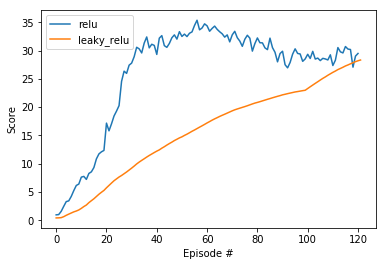

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
%matplotlib inline
#i load only the first run scores, 
path_scores = '../data/scores_relu.txt'
with open(path_scores) as f:
    array_scores_relu = np.array([float(item) for item in f.readlines()])

path_scores = '../data/scores_leaky_relu.txt'
with open(path_scores) as f:
    array_scores_leaky_relu = np.array([float(item) for item in f.readlines()])

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(array_scores_relu)), array_scores_relu,label='relu')
plt.plot(np.arange(len(array_scores_leaky_relu)), array_scores_leaky_relu,label='leaky_relu')
plt.ylabel('Score')
plt.xlabel('Episode #')
pylab.legend(loc='upper left')
plt.show()

## MODEL
- The model (**checkpoint_actor_1.pth**,**checkpoint_critic_1.pth**) with the final results is stored in the model folder

## Video
- Video with Agent in action : https://youtu.be/ryAWEyv8bm4

## Future works:
- Use different algorithm like [Raimbow](https://arxiv.org/abs/1710.02298)
- Change the approach for action exploration using [OpenAI approach](https://blog.openai.com/better-exploration-with-parameter-noise/) or noise netoworks as explanined [here](https://youtu.be/L6xaQ501jEs?t=3046)